## Visualizing earthquakes 

Let's use Plotly to make an exploratory analysis of a dataset that gathers data from various incidents around the world, and in particular lots of earthquakes that have occured since 1965 !

The dataset is available on Kaggle, you can download it and you'll find a description here :  https://www.kaggle.com/usgs/earthquake-database

## Beginning with the dataset

1. Import pandas and the different packages of Plotly

- ```import plotly.express as px```
- ```import plotly.graph_objects as go```
- ```import plotly.io as pio```
- ```from plotly.subplots make_subplots```

In [1]:
!pip install plotly==4.8.1
!jupyter labextension install jupyterlab-plotly

Building jupyterlab assets (build:prod:minimize)


In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import pandas as pd

2. Read the file and show the first rows as well as basic statistics about the dataset

The dataset we are going to use is ```earthquakes.csv```

In [3]:
datas = pd.read_csv("earthquakes.csv")

In [4]:
datas.describe()

Latitude     Longitude         Depth  Depth Error  \
count  23409.000000  23409.000000  23409.000000  4460.000000   
mean       1.678763     39.636726     70.748526     4.991118   
std       30.113379    125.514881    122.605748     4.873905   
min      -77.080000   -179.997000     -1.100000     0.000000   
25%      -18.652000    -76.352000     14.530000     1.800000   
50%       -3.569000    103.981000     33.000000     3.500000   
75%       26.188000    145.027000     54.000000     6.300000   
max       86.005000    179.998000    700.000000    91.295000   

       Depth Seismic Stations     Magnitude  Magnitude Error  \
count             7096.000000  23409.000000       327.000000   
mean               275.362176      5.882558         0.071820   
std                162.152976      0.423084         0.051466   
min                  0.000000      5.500000         0.000000   
25%                146.000000      5.600000         0.046000   
50%                255.000000      5.700000         0.059000   
75%                384.000000      6.000000         0.075500   
max                934.000000      9.100000         0.410000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                 2564.000000    7298.000000          1604.000000   
mean                    48.944618      44.165158             3.992660   
std                     62.943106      32.143388             5.377262   
min                      0.000000       0.000000             0.004505   
25%                     10.000000      24.100000             0.968750   
50%                     28.000000      36.000000             2.319500   
75%                     66.000000      54.000000             4.724500   
max                    821.000000     360.000000            37.874000   

       Horizontal Error  Root Mean Square  
count       1156.000000      17350.000000  
mean           7.662759          1.022766  
std           10.430396          0.188544  
min            0.085000          0.000000  
25%            5.300000          0.900000  
50%            6.700000          1.000000  
75%            8.100000          1.130000  
max           99.000000          3.440000

In [5]:
datas.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

3. In the following, we will use a lot the `Date` column. To avoid problems with your visualizations, use pandas to convert this column into `Datetime` type

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html" target="_blank">Here</a> you have documentation of pandas to convert to datetime

In [6]:
datas.Date = pd.to_datetime(datas.Date)
datas.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0 1965-01-02  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1 1965-01-04  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2 1965-01-05  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3 1965-01-08  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4 1965-01-09  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

## Exploring the number of observations over time 

4. Make a simple plot with ```plotly express``` to display the number of observed events as a function of time

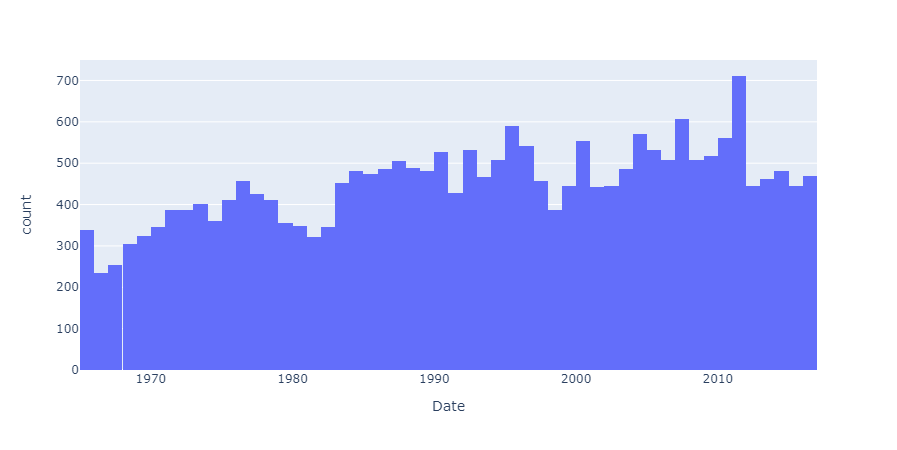

In [7]:
fig = px.histogram(datas, x="Date")
fig.show()

If the `Date` column was converted into `Datetime`, plotly handles it and has automatically set the number of bins such that the counts are made by year. This makes the histogram easily readable.

In the following, you will create customized plots with ```plotly.graph_objects``` to display more accurate information about the number of events.

5. With ```plotly.graph_objects```, create a histogram with a range slider such that you can visualize the daily number of events

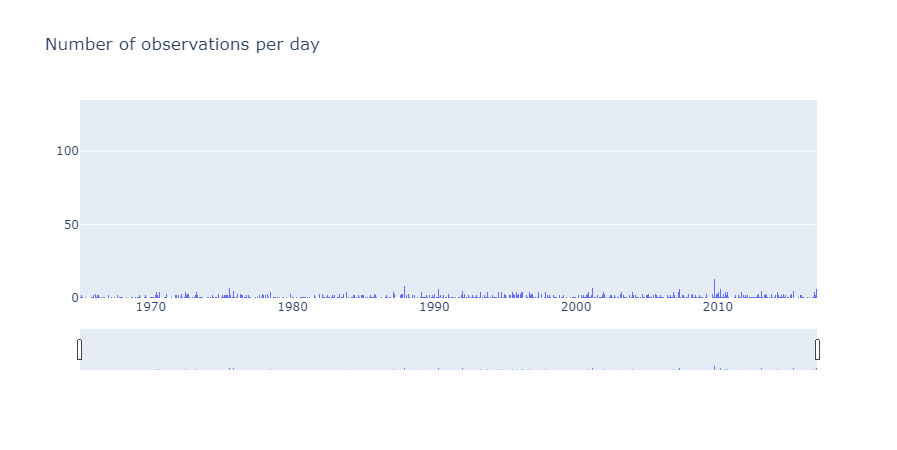

In [8]:
fig = go.Figure(data=[go.Histogram(x=datas.Date,
                                   autobinx=False, 
                                   xbins=dict(size='D'))], 
                layout=go.Layout(
                    title=go.layout.Title(text="Number of observations per day")))
fig.update_xaxes(rangeslider_visible=True)

fig.show()

6. **Optional** We would like to check if there's some seasonality in the number of events. 

Create new columns in the dataset:
- ```Month```
- ```Year``` 

Then use plotly's `make_subplots` function to display the monthly number of observations over a given year, independently for each of the five last years (so, there will be 5 independent historgrams)

In [9]:
datetimeindex = pd.DatetimeIndex(datas.Date)
datas["Year"] = datetimeindex.year
datas["Month"] = datetimeindex.month
display(datas)

Date      Time  Latitude  Longitude        Type   Depth  \
0     1965-01-02  13:44:18   19.2460   145.6160  Earthquake  131.60   
1     1965-01-04  11:29:49    1.8630   127.3520  Earthquake   80.00   
2     1965-01-05  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3     1965-01-08  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4     1965-01-09  13:32:50   11.9380   126.4270  Earthquake   15.00   
...          ...       ...       ...        ...         ...     ...   
23404 2016-12-28  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23405 2016-12-28  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23406 2016-12-28  12:38:51   36.9179   140.4262  Earthquake   10.00   
23407 2016-12-29  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23408 2016-12-30  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0             MW  ...   
1              NaN                     NaN        5.8             MW  ...   
2              NaN                     NaN        6.2             MW  ...   
3              NaN                     NaN        5.8             MW  ...   
4              NaN                     NaN        5.8             MW  ...   
...            ...                     ...        ...            ...  ...   
23404          1.2                    40.0        5.6             ML  ...   
23405          2.0                    33.0        5.5             ML  ...   
23406          1.8                     NaN        5.9            MWW  ...   
23407          1.8                     NaN        6.3            MWW  ...   
23408          2.2                     NaN        5.5             MB  ...   

       Horizontal Distance  Horizontal Error  Root Mean Square            ID  \
0                      NaN               NaN               NaN  ISCGEM860706   
1                      NaN               NaN               NaN  ISCGEM860737   
2                      NaN               NaN               NaN  ISCGEM860762   
3                      NaN               NaN               NaN  ISCGEM860856   
4                      NaN               NaN               NaN  ISCGEM860890   
...                    ...               ...               ...           ...   
23404                0.120               NaN            0.1898    NN00570710   
23405                0.129               NaN            0.2187    NN00570744   
23406                0.992               4.8            1.5200    US10007NAF   
23407                3.553               6.0            1.4300    US10007NL0   
23408                0.681               4.5            0.9100    US10007NTD   

       Source  Location Source Magnitude Source     Status  Year Month  
0      ISCGEM           ISCGEM           ISCGEM  Automatic  1965     1  
1      ISCGEM           ISCGEM           ISCGEM  Automatic  1965     1  
2      ISCGEM           ISCGEM           ISCGEM  Automatic  1965     1  
3      ISCGEM           ISCGEM           ISCGEM  Automatic  1965     1  
4      ISCGEM           ISCGEM           ISCGEM  Automatic  1965     1  
...       ...              ...              ...        ...   ...   ...  
23404      NN               NN               NN   Reviewed  2016    12  
23405      NN               NN               NN   Reviewed  2016    12  
23406      US               US               US   Reviewed  2016    12  
23407      US               US               US   Reviewed  2016    12  
23408      US               US               US   Reviewed  2016    12  

[23409 rows x 23 columns]

In [10]:
display(datas.Year.unique())

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

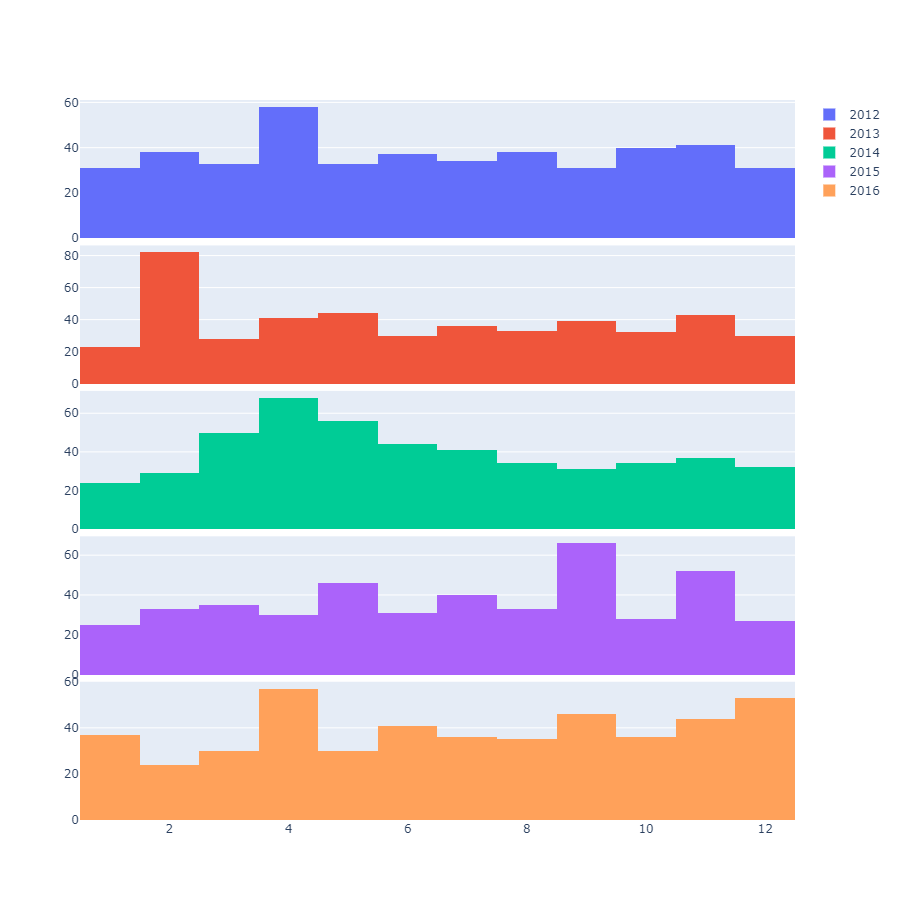

7. **Optional** Now, we would like to allow the user to choose a specific year among the five last years, and display the daily number of observations fot this year only. Use the `Updatemenu` and `Button` classes together with `add_trace` to create an interactive visualization. 

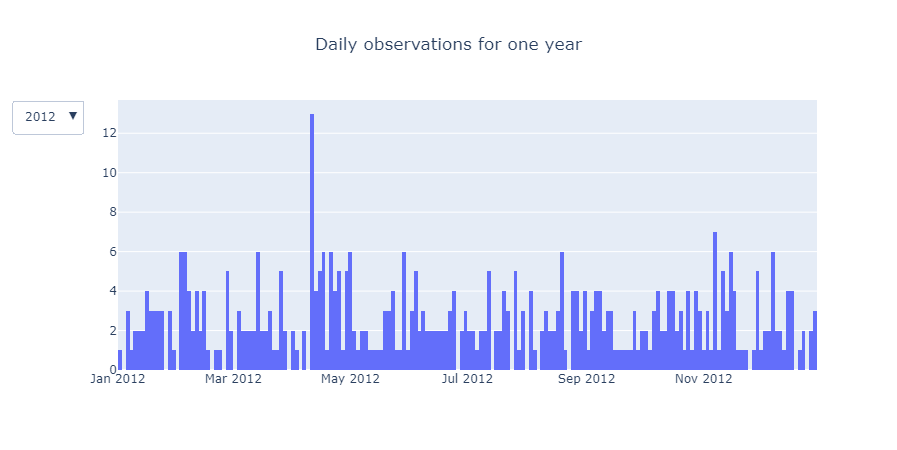

## Focusing on earthquakes

8. Use ```plotly express``` to display the proportion of each type of events in the dataset

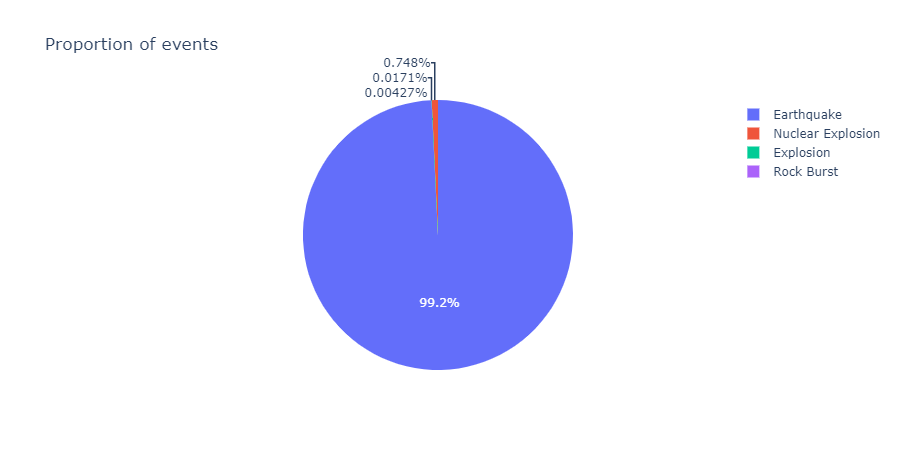

In [11]:
test = datas.Type.value_counts().reset_index()
fig = px.pie(values=test.Type, names=test["index"], title='Proportion of events')
fig.show()

9. Create a new dataset containing only earthquakes and plot the distribution of their magnitudes depths

In [12]:
eartquakes = datas[datas["Type"] == "Earthquake"]
eartquakes.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0 1965-01-02  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1 1965-01-04  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2 1965-01-05  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3 1965-01-08  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4 1965-01-09  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  Horizontal Distance  \
0                     NaN        6.0             MW  ...                  NaN   
1                     NaN        5.8             MW  ...                  NaN   
2                     NaN        6.2             MW  ...                  NaN   
3                     NaN        5.8             MW  ...                  NaN   
4                     NaN        5.8             MW  ...                  NaN   

   Horizontal Error  Root Mean Square            ID  Source  Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM           ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM           ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM           ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM           ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM           ISCGEM   

  Magnitude Source     Status  Year Month  
0           ISCGEM  Automatic  1965     1  
1           ISCGEM  Automatic  1965     1  
2           ISCGEM  Automatic  1965     1  
3           ISCGEM  Automatic  1965     1  
4           ISCGEM  Automatic  1965     1  

[5 rows x 23 columns]

Let's make some histograms to understand our datas:
- The count by ```Magnitude```
- The count by ```Depth```

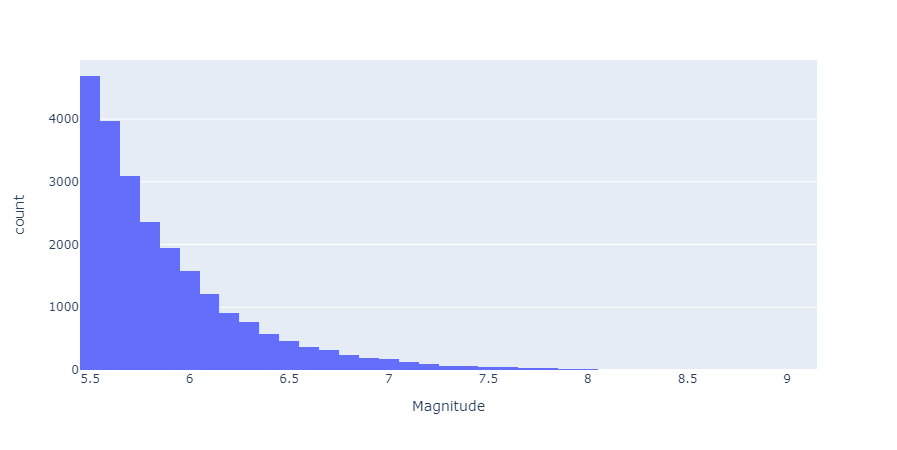

In [21]:
fig = px.histogram(datas, x="Magnitude")
fig.update_traces(xbins=dict(size=0.1))
fig.show()

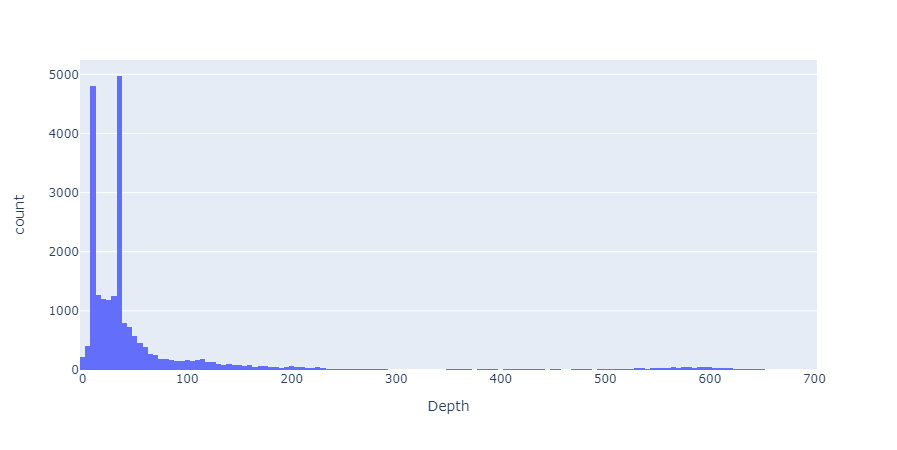

In [15]:
fig = px.histogram(datas, x="Depth")
fig.show()

10. Now, we'd like to explore the evolution of the magnitudes as a function of time :


- Create a dataframe containing the mean magnitudes per day
- Then use this dataset to display the mean magnitudes per day, with a range slider allowing the user to navigate among the dates
- **Optional** Add a reference line showing the value of the mean magnitude computed over the whole dataset


In [27]:
magnitude = datas.groupby("Date")["Magnitude"].mean().reset_index()
magnitude.head()

Date  Magnitude
0 1965-01-02        6.0
1 1965-01-04        5.8
2 1965-01-05        6.2
3 1965-01-08        5.8
4 1965-01-09        5.8

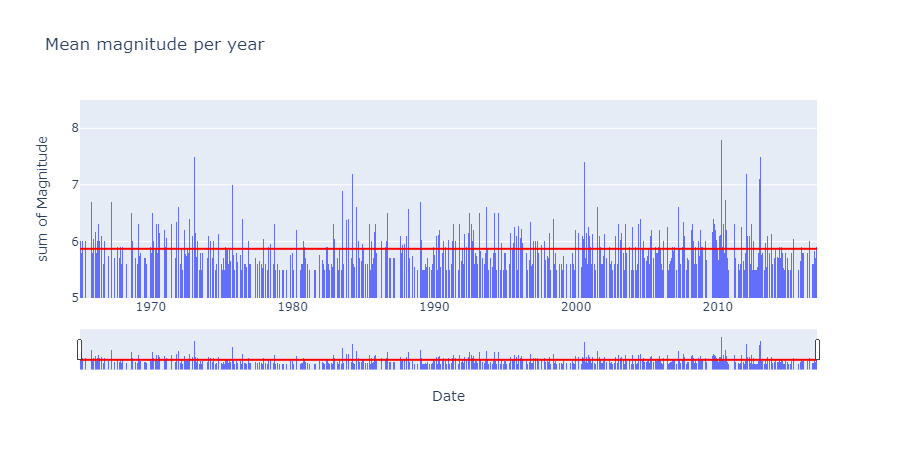

In [43]:
fig = px.histogram(magnitude, x="Date", y="Magnitude", title='Mean magnitude per year')

fig.update_traces(xbins=dict(size="D"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_yaxes(range=[5, 8.5])
fig.add_trace(
    go.Scatter(
        x=[magnitude.Date.min(), magnitude.Date.max()],
        y=[magnitude.Magnitude.mean(), magnitude.Magnitude.mean()],
        mode="lines",
        line=go.scatter.Line(color="Red"),
        showlegend=False)
)

fig.show()

To finish, let's visualize the distribution of the earthquakes around the world.

11. Use plotly express' `scatter_mapbox` to display the earthquakes on a map. Change the color of the markers depending on the value of the magnitude. Use the documentation and <a href="https://plotly.com/python/builtin-colorscales/" target="_blank">this page</a> to find a suitable colorscale.

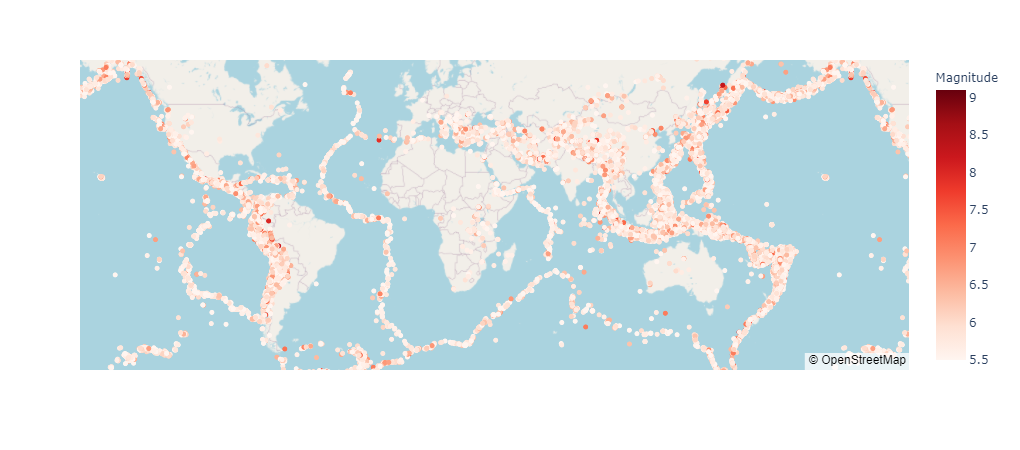

12. Let's make the map animated ! Add some arguments in `scatter_mapbox` to create an animation displaying the earthquakes year by year

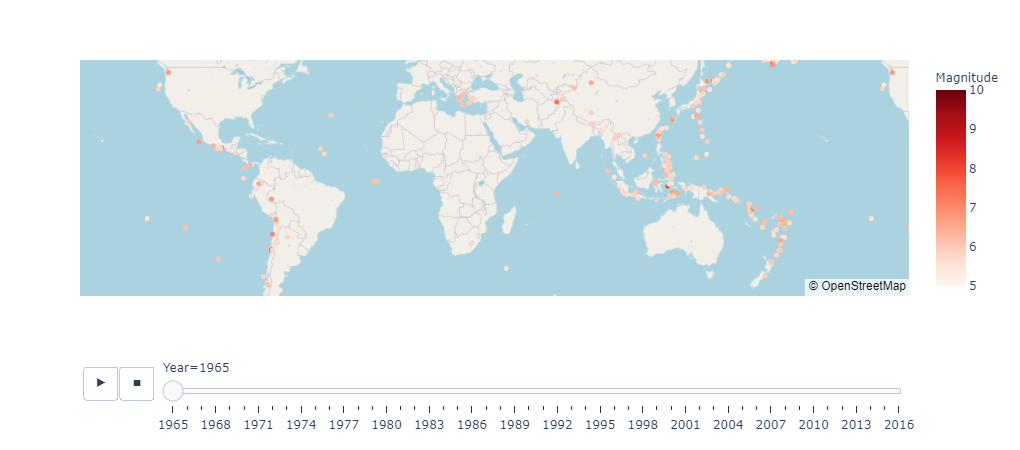

13. **Optional** Look for another function in plotly express that allows to display on a map the *density of earthquakes* (instead of each earthquake separately), and make it animated to display the evolution year by year.

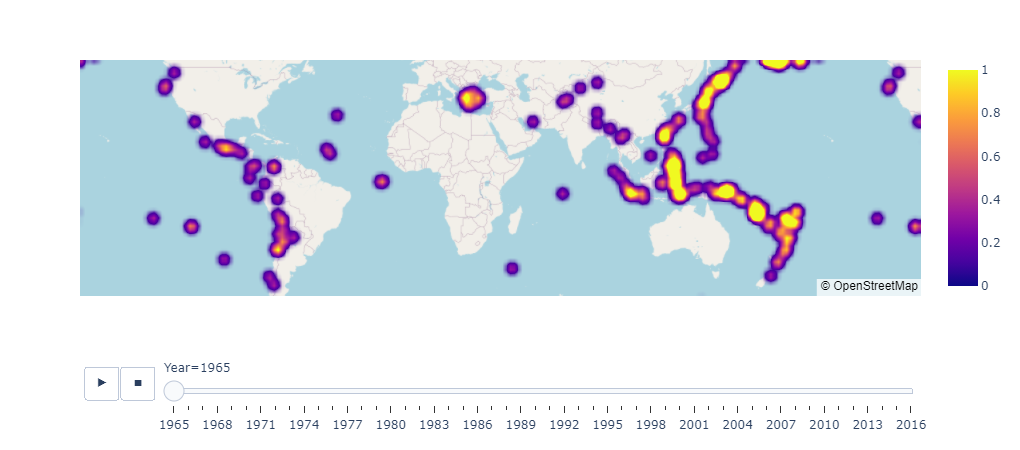